In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

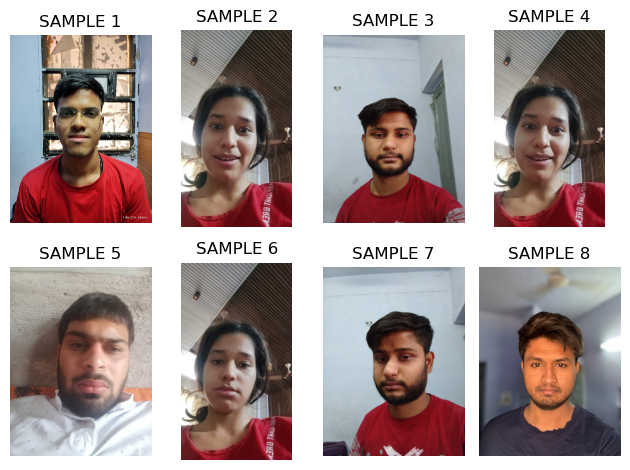

In [13]:
c=1
for i in range(0,8):
    x=np.random.randint(0,len(os.listdir(r"E:\Projects\Emotion Detector\Datasets\testing")))
    image=os.listdir(r"E:\Projects\Emotion Detector\Datasets\testing")[x]
    path=os.path.join(r"E:\Projects\Emotion Detector\Datasets\testing",image)
    img=cv.imread(path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.subplot(2,4,c)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'SAMPLE {c}')
    c+=1
plt.tight_layout()
plt.show()

In [14]:
data=ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                       height_shift_range=0.2,shear_range=0.2, zoom_range=0.2,
                       horizontal_flip=True, fill_mode='nearest')

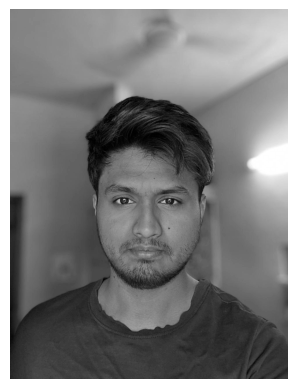

In [15]:
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [16]:
img=cv.resize(img,(224,224))

In [17]:
img_arr=np.array(img)
img_arr=img_arr.reshape((1,)+img_arr.shape+(1,))

In [18]:
img_arr.shape

(1, 224, 224, 1)

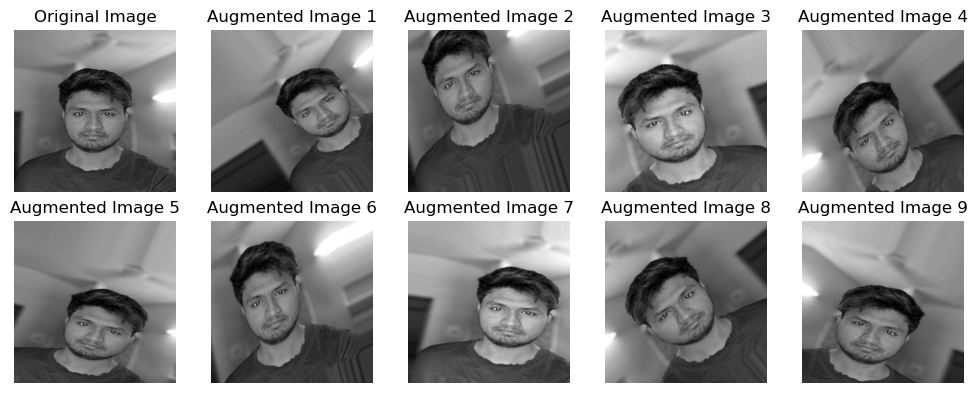

In [19]:
fig,axes=plt.subplots(nrows=2,ncols=5,figsize=(10,4))
axes[0,0].imshow(img_arr[0,:,:,0],cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original Image')

aug_iter=data.flow(img_arr,batch_size=1)

for i,ax in enumerate(axes.flat[1:]):
    aug_img=next(aug_iter)[0]
    ax.imshow(aug_img[:,:,0],cmap='gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()